In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
# Load the datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [5]:
# Preview the datasets
print(customers_df.head())
print(products_df.head())
print(transactions_df.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [12]:
# Merge transactions with customer and product data
merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

In [13]:
# Aggregate features for each customer
customer_features = merged_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',       
    'Quantity': 'sum',       
    'ProductID': 'nunique'  
}).reset_index()

In [14]:
# Add customer region information
customer_features = customer_features.merge(customers_df[['CustomerID', 'Region']], on='CustomerID')

In [15]:
# Preview the customer features table
print(customer_features.head())

  CustomerID  TotalValue  Quantity  ProductID         Region
0      C0001     3354.52        12          5  South America
1      C0002     1862.74        10          4           Asia
2      C0003     2725.38        14          4  South America
3      C0004     5354.88        23          8  South America
4      C0005     2034.24         7          3           Asia


In [16]:
# Normalize features to bring them to the same scale
scaler = StandardScaler()
customer_features[['TotalValue', 'Quantity', 'ProductID']] = scaler.fit_transform(customer_features[['TotalValue', 'Quantity', 'ProductID']])

In [17]:
# Preview normalized data
print(customer_features.head())

  CustomerID  TotalValue  Quantity  ProductID         Region
0      C0001   -0.061701 -0.122033   0.050047  South America
1      C0002   -0.877744 -0.448000  -0.424204           Asia
2      C0003   -0.405857  0.203934  -0.424204  South America
3      C0004    1.032547  1.670787   1.472798  South America
4      C0005   -0.783929 -0.936951  -0.898455           Asia


In [18]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(customer_features[['TotalValue', 'Quantity', 'ProductID']])

In [19]:
#  clustering quality using Davies-Bouldin Index
db_index = davies_bouldin_score(customer_features[['TotalValue', 'Quantity', 'ProductID']], customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.938455524595955


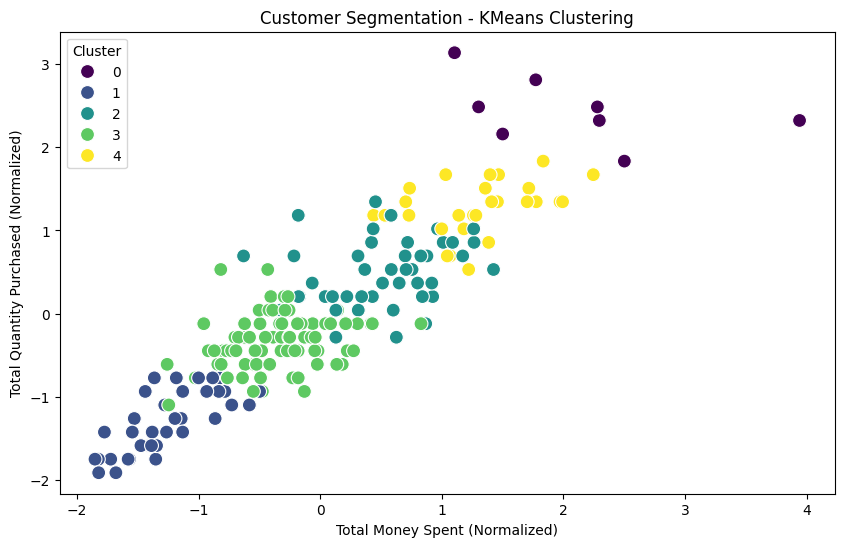

In [21]:
# Visualizing the clusters using scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalValue', y='Quantity', hue='Cluster', data=customer_features, palette='viridis', s=100)
plt.title('Customer Segmentation - KMeans Clustering')
plt.xlabel('Total Money Spent (Normalized)')
plt.ylabel('Total Quantity Purchased (Normalized)')
plt.legend(title='Cluster')
plt.show()


In [22]:
# Save the clustering results
customer_features[['CustomerID', 'Cluster']].to_csv('Customer_Segmentation.csv', index=False)

In [23]:
# Preview the saved file
print(customer_features[['CustomerID', 'Cluster']].head())

  CustomerID  Cluster
0      C0001        3
1      C0002        3
2      C0003        3
3      C0004        4
4      C0005        1


In [25]:
#  PCA to reduce features to 2D for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(customer_features[['TotalValue', 'Quantity', 'ProductID']])

In [26]:
# Add the PCA components to the DataFrame
customer_features['PCA1'] = principal_components[:, 0]
customer_features['PCA2'] = principal_components[:, 1]

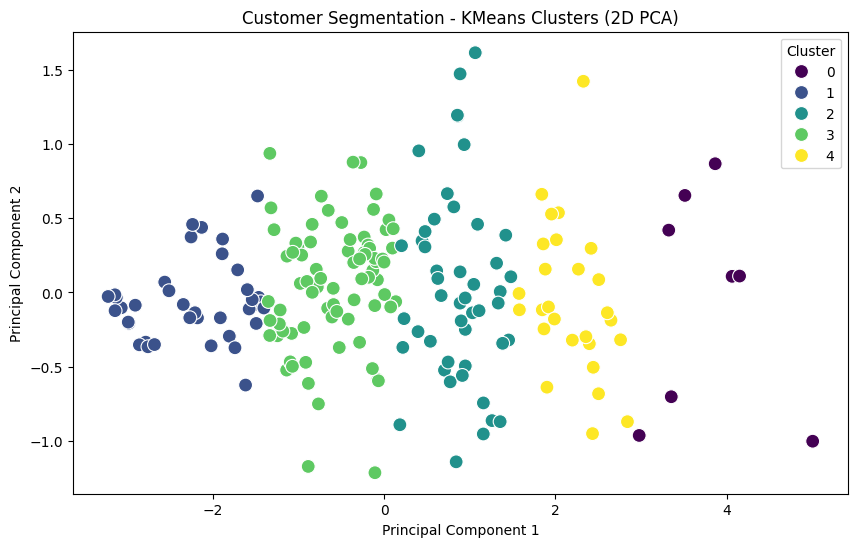

In [27]:
# Visualize the clusters in 2D space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_features, palette='viridis', s=100)
plt.title('Customer Segmentation - KMeans Clusters (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

This plot shows the distribution of customers in the reduced 2D space with different colors for each cluster.